In [22]:
%reset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

In [24]:
# Load the data
df = pd.read_csv('../../data/processed/processed_features.csv')
df.head()

,year,is_holiday,passenger_count,distance,month_1,month_2,month_3,month_4,month_5,month_6,...,dropoff_neighborhood_Sunnyside,dropoff_neighborhood_Theater District,dropoff_neighborhood_Tribeca,dropoff_neighborhood_Two Bridges,dropoff_neighborhood_Upper East Side,dropoff_neighborhood_Upper West Side,dropoff_neighborhood_Vinegar Hill,dropoff_neighborhood_West Village,dropoff_neighborhood_Williamsburg,fare
0,2015,0,1,1.681111,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7.5
1,2009,0,1,2.454363,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.7
2,2009,0,1,5.039603,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,12.9
3,2009,0,3,1.661442,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5.3
4,2014,0,5,4.483730,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.0


In [25]:
# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('fare', axis=1), df['fare'], test_size=0.025, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.025, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)

(177451, 152) (4551, 152) (4667, 152)


In [26]:
# Normalize the data
normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)

2022-07-12 11:43:54.972075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-12 11:43:54.998622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [27]:
# Define the model with normalization
model = tf.keras.Sequential([
    normalize,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])
# Compile the model with the Adam optimizer and the root mean squared error loss function
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mse', metrics=[root_mean_squared_error])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 152)              305       
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 10)                1530      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,956
Trainable params: 1,651
Non-trainable params: 305
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=4096)

Epoch 1/100
 1/44 [..............................] - ETA: 21s - loss: 119.0546 - root_mean_squared_error: 9.4314

2022-07-12 11:45:42.620979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 1s 17ms/step - loss: 104.9973 - root_mean_squared_error: 8.7181 - val_loss: 88.7910 - val_root_mean_squared_error: 7.8303
Epoch 2/100
 6/44 [===>..........................] - ETA: 0s - loss: 87.0154 - root_mean_squared_error: 7.7142

2022-07-12 11:45:43.465552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 1s 12ms/step - loss: 74.1887 - root_mean_squared_error: 6.9522 - val_loss: 57.7317 - val_root_mean_squared_error: 5.9456
Epoch 3/100
44/44 [==============================] - 0s 11ms/step - loss: 44.1102 - root_mean_squared_error: 5.0756 - val_loss: 31.9429 - val_root_mean_squared_error: 4.2602
Epoch 4/100
44/44 [==============================] - 0s 11ms/step - loss: 24.4654 - root_mean_squared_error: 3.7313 - val_loss: 19.4527 - val_root_mean_squared_error: 3.3497
Epoch 5/100
44/44 [==============================] - 0s 11ms/step - loss: 17.0879 - root_mean_squared_error: 3.1446 - val_loss: 15.5537 - val_root_mean_squared_error: 2.9963
Epoch 6/100
44/44 [==============================] - 0s 11ms/step - loss: 14.5253 - root_mean_squared_error: 2.8997 - val_loss: 13.7740 - val_root_mean_squared_error: 2.8077
Epoch 7/100
44/44 [==============================] - 0s 11ms/step - loss: 12.9018 - root_mean_squared_error: 2.7274 - val_loss: 12.3417 - val_

In [29]:
# Evaluate the model on the validation set
model.evaluate(X_test, y_test)

146/146 [==============================] - 1s 6ms/step - loss: 3.7977 - root_mean_squared_error: 1.3296


[3.797703981399536, 1.3296338319778442]

In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error,epoch
95,3.458194,1.284117,3.614663,1.292943,95
96,3.456372,1.284139,3.606425,1.290974,96
97,3.455030,1.283212,3.616486,1.293383,97
98,3.451813,1.282664,3.618344,1.293222,98
99,3.449511,1.282088,3.613076,1.290784,99


In [31]:
def plot_loss(history):
    plt.plot(history.history['root_mean_squared_error'], label='root_mean_squared_error')
    plt.plot(history.history['val_root_mean_squared_error'], label='val_root_mean_squared_error')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

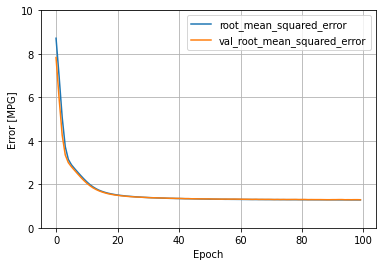

In [32]:
plot_loss(history)

In [33]:
model.save("../../models")

INFO:tensorflow:Assets written to: ../../models/assets
